## Actividad 4

**1.  Cargue  los  datos  y  revise  los  formatos  de  cada  variable,  recuerde codificar las variables como numéricas o factores según corresponda.**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ABAC.csv')
df.sample()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,Desempeño
272,0,44.0,56.0,4201.666667,1294,10,Male,2,Sales,Area Sales Manager,PIP


**2.  Realice  un  análisis  descriptivo  de  sus  datos.  Determinar  si  existen observaciones  faltantes,  en  el  caso  de  existir  tome  la  decisión  de omitirlas  del  estudio  u  omitir  la  variable.  Evalúe  si  existen  posibles incongruencias en la fuente de datos (ej: edades negativas). Y finalmente  análice  la  presencia  de  valores  atípicos  en  las variables.  Comente.**

In [5]:
df.shape

(310, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estado           310 non-null    int64  
 1   Edad             310 non-null    float64
 2   Ratio.Pago       310 non-null    float64
 3   Salario          310 non-null    float64
 4   Dias.trabajados  310 non-null    int64  
 5   Ausencias        310 non-null    int64  
 6   Sexo             310 non-null    object 
 7   Estado.Civil     310 non-null    int64  
 8   Departamento     310 non-null    object 
 9   Posicion         310 non-null    object 
 10  Desempeño        310 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 26.8+ KB


In [23]:
df.describe()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Estado.Civil
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.409677,38.867742,31.284806,4606.534839,1296.080645,10.264516,2.903226
std,0.492569,8.922459,15.383615,1677.350176,769.491382,5.843235,1.150625
min,0.000000,25.000000,14.000000,3004.600000,2.000000,1.000000,1.000000
25%,0.000000,32.000000,20.000000,3707.033333,766.250000,5.000000,2.000000
50%,0.000000,37.000000,24.000000,4190.666667,1238.000000,10.000000,3.000000
75%,1.000000,44.000000,45.315000,4804.733333,1732.750000,15.000000,4.000000
max,1.000000,67.000000,80.000000,16666.666667,4339.000000,20.000000,5.000000


In [22]:
for i in ['Sexo','Departamento','Estado.Civil']:
    print(i,'\n', df[i].value_counts(),'\n')

Sexo 
 Female    177
Male      133
Name: Sexo, dtype: int64 

Departamento 
 Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Departamento, dtype: int64 

Estado.Civil 
 4    137
2    123
1     30
3     12
5      8
Name: Estado.Civil, dtype: int64 



Observamos que no existen datos nulos, los valores maximos y minimos no parecen ser anomalos, podemos notar como existen datos de empleados recien contratados (2 dias de dias trabajados)

**3.  Realice  análisis  de  cómo  se  relacionan  las  variables continuas con  la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df.columns

Index(['Estado', 'Edad', 'Ratio.Pago', 'Salario', 'Dias.trabajados',
       'Ausencias', 'Sexo', 'Estado.Civil', 'Departamento', 'Posicion',
       'Desempeño'],
      dtype='object')

In [115]:
df['Desempeño'].value_counts()

Fully Meets                 181
N/A- too early to review     37
90-day meets                 31
Exceeds                      28
Needs Improvement            15
Exceptional                   9
PIP                           9
Name: Desempeño, dtype: int64

<AxesSubplot:xlabel='Estado', ylabel='Salario'>

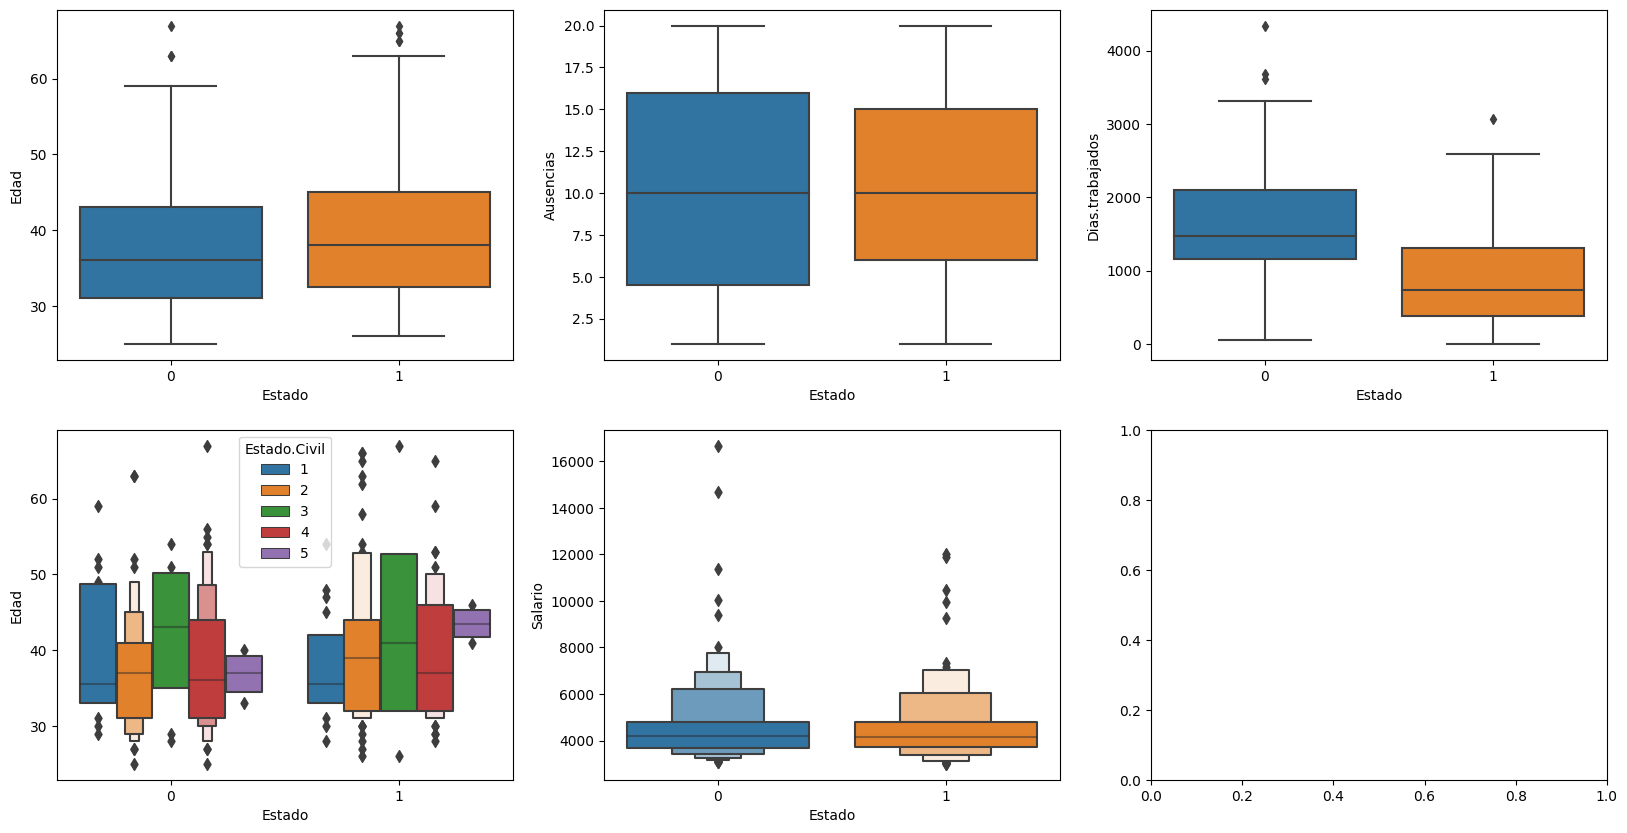

In [119]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,10))

sns.boxplot(y = 'Edad', x = 'Estado', data=df, ax=axs[0][0])


sns.boxplot(y = 'Ausencias', x = 'Estado', data=df, ax=axs[0][1])


sns.boxplot(y = 'Dias.trabajados', x = 'Estado', data=df, ax=axs[0][2])


sns.boxenplot(y = 'Edad', x='Estado', hue='Estado.Civil', data=df, ax=axs[1][0])

sns.boxenplot(y = 'Salario', x='Estado', data=df, ax=axs[1][1])

<AxesSubplot:xlabel='Estado', ylabel='count'>

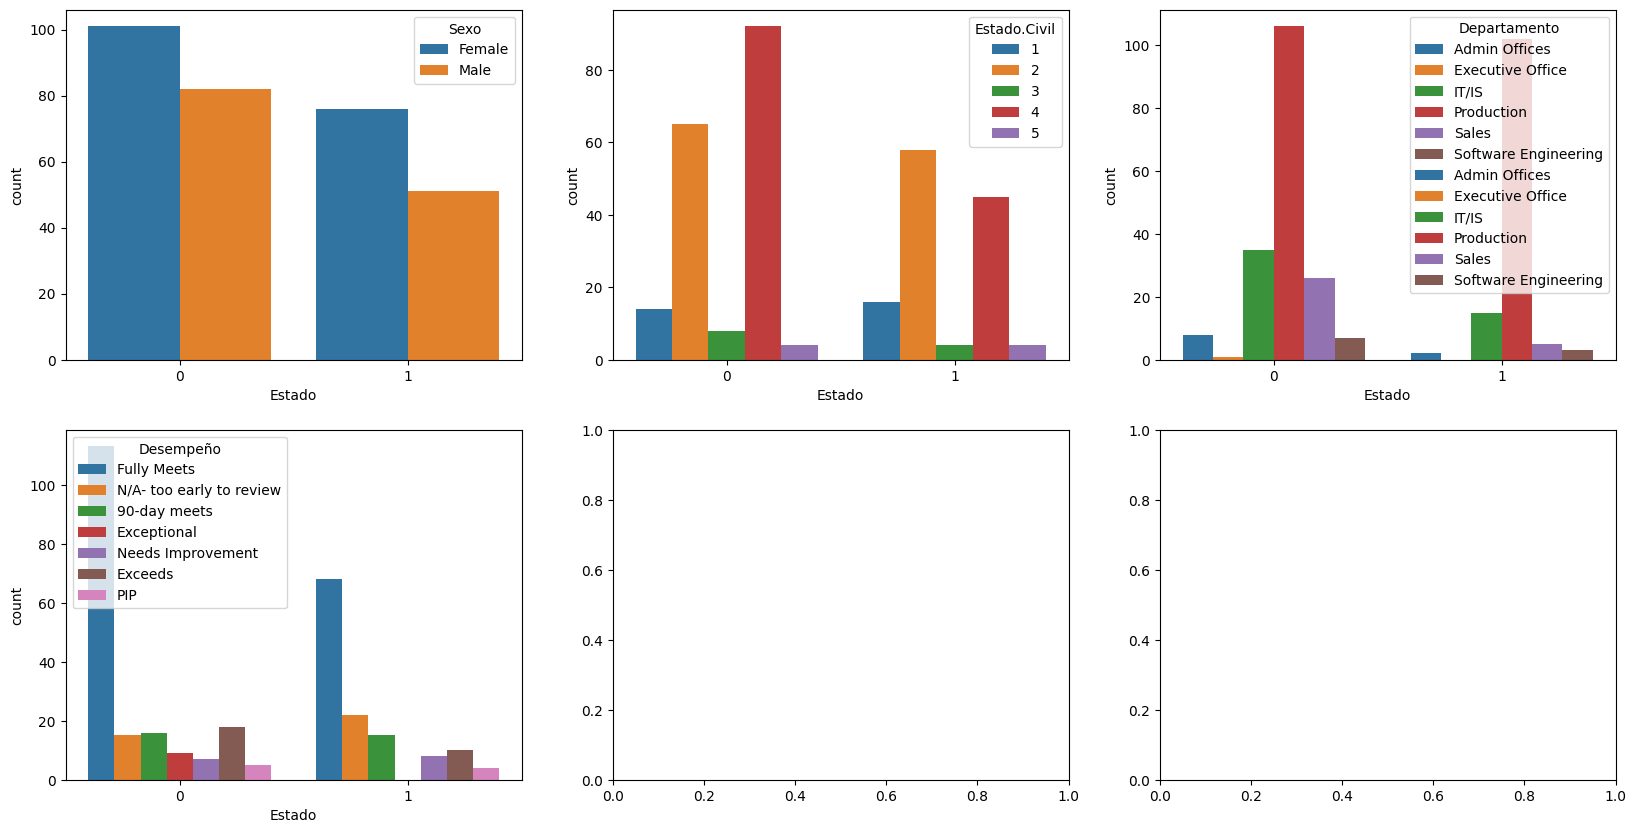

In [120]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,10))

sns.countplot(x = 'Estado', hue = 'Sexo', data=df, ax=axs[0][0])

sns.countplot(x = 'Estado', hue = 'Estado.Civil', data=df, ax=axs[0][1])

sns.countplot(x = 'Estado', hue = 'Departamento', data=df, ax=axs[0][2])

sns.countplot(x = 'Estado', hue = 'Departamento', data=df, ax=axs[0][2])

sns.countplot(x = 'Estado', hue = 'Desempeño', data=df, ax=axs[1][0])


In [98]:
df.groupby(['Estado']).mean().reset_index()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Estado.Civil
0,0,38.087432,33.835902,4618.233515,1612.857923,10.234973,3.038251
1,1,39.992126,27.608819,4589.677690,839.622047,10.307087,2.708661


**4.  Realice  análisis  de  cómo  se  relacionan  las  variables categóricas con  la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?**

In [61]:
# Convertir la columna "Sex" en variables numéricas usando codificación one-hot
abalone = pd.get_dummies(df, columns=["Sexo"],drop_first=True)

In [132]:
abalone

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Estado.Civil,Departamento,Posicion,Desempeño,Sexo_Male
0,0,30.0,28.50,4167.066667,3317,1,2,Admin Offices,Accountant I,Fully Meets,0
1,0,34.0,23.00,6962.466667,1420,17,1,Admin Offices,Accountant I,Fully Meets,1
2,0,31.0,29.00,4330.333333,1154,3,4,Admin Offices,Accountant I,Fully Meets,1
3,0,32.0,21.50,4332.733333,58,15,2,Admin Offices,Administrative Assistant,N/A- too early to review,0
4,0,30.0,16.56,3388.333333,940,2,4,Admin Offices,Administrative Assistant,N/A- too early to review,0
...,...,...,...,...,...,...,...,...,...,...,...
305,0,48.0,52.25,4029.733333,289,14,4,IT/IS,Senior BI Developer,Fully Meets,1
306,0,36.0,51.00,4392.866667,284,13,4,IT/IS,Senior BI Developer,Fully Meets,1
307,0,34.0,46.00,3234.200000,284,4,4,IT/IS,BI Developer,Fully Meets,1
308,0,30.0,45.00,14696.666667,220,16,2,IT/IS,BI Developer,Fully Meets,1
